In [1]:
# Import necessary libraries for data handling, vectorization, and classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:

# Load dataset from CSV file
frame = pd.read_csv('fake_or_real_news.csv', low_memory=False)

# Handle missing values by replacing them with 'NaN'
frame[pd.isnull(frame)] = 'NaN'

# Set index to an unnamed column
frame = frame.set_index("Unnamed: 0")

# Drop rows with missing values to clean the data
data = frame.dropna()

# Define the target variable 'y' as the 'label' column
y = frame.label
print(y.head())  # Preview target labels

# Drop the 'label' column from the feature set
frame.drop("label", axis=1)


Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object


,title,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

# Split the dataset into training and testing sets (33% test size)
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.33, random_state=53)

# Initialize the CountVectorizer to extract features from text data
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data with the CountVectorizer
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted CountVectorizer
count_test = count_vectorizer.transform(X_test)


In [4]:

# Initialize the TfidfVectorizer for feature extraction using TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data with the TfidfVectorizer
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted TfidfVectorizer
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the transformed TF-IDF test set
print(tfidf_test)


  (0, 29800)	0.8571635611136458
  (0, 9861)	0.5150442985792322
  (1, 53698)	0.3252194831690456
  (1, 51612)	0.26647361529450964
  (1, 51399)	0.16972462507900363
  (1, 50153)	0.2170986869908999
  (1, 49815)	0.35462739813612415
  (1, 48725)	0.23709994521942462
  (1, 43438)	0.23951824561821972
  (1, 42084)	0.17785034337851724
  (1, 36866)	0.18850320244955115
  (1, 34102)	0.24525561824733755
  (1, 30695)	0.22350216188740737
  (1, 23720)	0.21501828013147872
  (1, 16783)	0.18319780321364093
  (1, 15658)	0.18510678940400643
  (1, 13357)	0.21042893734999282
  (1, 13347)	0.18408672424956707
  (1, 8622)	0.22511386415030168
  (1, 8621)	0.19977415027038287
  (1, 5067)	0.21876715403247657
  (2, 55871)	0.04993492033278148
  (2, 55618)	0.015828039602249735
  (2, 55392)	0.023927378610970534
  (2, 55375)	0.061308624894574275
  :	:
  (2572, 10373)	0.0618424552031402
  (2572, 10362)	0.2120095864152846
  (2572, 9416)	0.09094804528682138
  (2572, 8867)	0.0976414452462832
  (2572, 8806)	0.059702777611783955

In [5]:

# Convert count vectorized training data into DataFrame for comparison with TF-IDF
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

# Convert TF-IDF vectorized training data into DataFrame for comparison
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

# Compare differences in feature names extracted by CountVectorizer and TfidfVectorizer
difference = set(count_df.columns) - set(tfidf_df.columns)
print(count_df.equals(tfidf_df))  # Check if both DataFrames are equal

# Preview CountVectorizer DataFrame
count_df.head()


False


,00,000,0000,000000031,00000031,0001,0002,000ft,000x,001,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,عربي,ยงade
0,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize the confusion matrix if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Naive Bayes (TF-IDF) accuracy:   0.792
Confusion matrix, without normalization


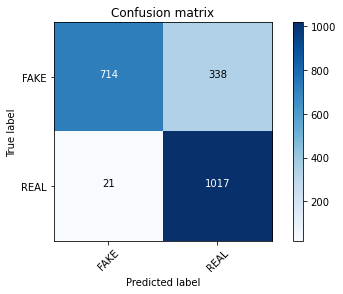

In [7]:

# Train the Naive Bayes classifier using the TF-IDF features
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)

# Make predictions using the TF-IDF test data
pred = clf.predict(tfidf_test)

# Calculate and print the accuracy of the model
score = accuracy_score(y_test, pred)
print("Naive Bayes (TF-IDF) accuracy:   %0.3f" % score)

# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


Naive Bayes (CountVectorizer) accuracy:   0.846
Confusion matrix, without normalization


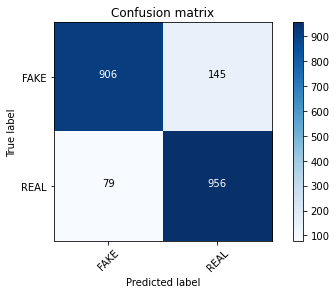

In [8]:

# Train the Naive Bayes classifier using CountVectorizer features
clf = MultinomialNB()
clf.fit(count_train, y_train)

# Make predictions using the CountVectorizer test data
pred = clf.predict(count_test)

# Calculate and print the accuracy of the model
score = accuracy_score(y_test, pred)
print("Naive Bayes (CountVectorizer) accuracy:   %0.3f" % score)

# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()


Passive Aggressive accuracy:   0.880
Confusion matrix, without normalization


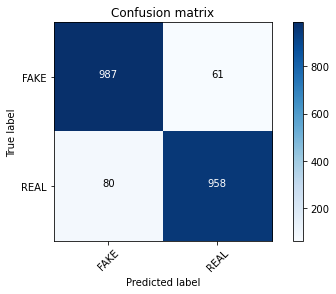

In [9]:

# Train a Passive Aggressive Classifier using the TF-IDF features
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(tfidf_train, y_train)

# Make predictions using the TF-IDF test data
pred = linear_clf.predict(tfidf_test)

# Calculate and print the accuracy of the Passive Aggressive Classifier
score = accuracy_score(y_test, pred)
print("Passive Aggressive accuracy:   %0.3f" % score)

# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()
